In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nighres.io import io_mesh
import gdist
from brainsmash.mapgen.sampled import Sampled
from brainsmash.mapgen.memmap import txt2memmap

In [3]:
data_dir = '/home/julia/data/gradients/'

### Create Geodesic distance map inside cortex mask

In [16]:
mesh = io_mesh.load_mesh(data_dir+'results/embedding/embed_sampled_mesh.vtk')
cortex = np.where(mesh['data'][:,0]!=0)[0]
np.save(data_dir+'results/null_models/surface/cortex_mask.npy', cortex)
np.save('/home/julia/data/gradients/results/null_models/surface/points.npy', mesh['points'])
np.save('/home/julia/data/gradients/results/null_models/surface/faces.npy', mesh['faces'])

In [ ]:
cortex = np.load(data_dir+'results/null_models/surface/cortex_mask.npy')
points = np.load(data_dir+'results/null_models/surface/points.npy')
faces = np.load(data_dir+'results/null_models/surface/faces.npy')

In [ ]:
for idx in range(cortex.shape[0]-1)
    dist = gdist.compute_gdist(np.array(points, dtype=np.float64),
                               np.array(faces, dtype=np.int32),
                               source_indices=np.array([cortex[idx]], dtype=np.int32),
                               target_indices=np.array(cortex[idx+1:], dtype=np.int32))

    np.save(data_dir+'results/null_models/surface/iter/idx_{}.npy'.format(idx), dist)

In [11]:
dist_matrix = np.zeros(shape=(cortex.shape[0],cortex.shape[0]))
for r in range(cortex.shape[0]-1):
    dist_matrix[r, r+1:] = np.load(data_dir+'results/null_models/surface/iter/idx_{}.npy'.format(r))
dist_matrix += dist_matrix.T

In [17]:
np.savetxt(data_dir+'results/null_models/surface/geodesic_dist_matrix.txt', dist_matrix)

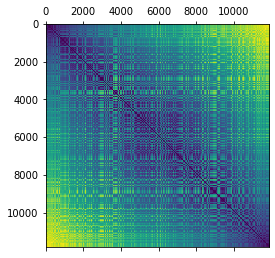

In [13]:
plt.matshow(dist_matrix)

### Create memory mapped arrays for surrogates

In [ ]:
output_files = txt2memmap(data_dir+"results/null_models/geodesic_dist_matrix.txt", 
                          data_dir+"results/null_models", 
                          maskfile=None, delimiter=' ')